<a href="https://colab.research.google.com/github/shruti0441/market-sentiment-vs-trader-actions/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv')
fg.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
tr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/historical_data.csv')
tr.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
fg['date'] = pd.to_datetime(fg['date'])

In [7]:
fg['classification'] = fg['classification'].str.strip().str.title()
fg['classification'].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [8]:
fg['date'] = fg['date'].dt.date


In [9]:
tr.columns = [c.strip().lower().replace(' ', '_') for c in tr.columns]
tr['timestamp_ist'] = pd.to_datetime(tr['timestamp_ist'], format="%d-%m-%Y %H:%M")
tr.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
tr['date'] = tr['timestamp_ist'].dt.date

In [11]:
num_cols = ['execution_price','size_tokens','size_usd','closed_pnl','fee','start_position']
for col in num_cols:
    tr[col] = pd.to_numeric(tr[col], errors='coerce')


In [12]:
tr.isna().sum().to_csv('csv_files/missing_values.csv')


In [13]:
tr = tr.dropna(subset=['execution_price','size_tokens'])


In [14]:
tr = tr[tr['size_tokens'] > 0]
tr = tr[tr['execution_price'] > 0]
tr = tr[tr['size_usd'] > 0]


In [15]:
tr['risk_exposure'] = tr['execution_price'] * tr['size_tokens']


In [16]:
tr['is_long'] = (tr['direction'] == 'long').astype(int)
tr['is_short'] = (tr['direction'] == 'short').astype(int)


In [17]:
tr['profit_flag'] = (tr['closed_pnl'] > 0).astype(int)


In [18]:
tr.to_csv('csv_files/cleaned_hyperliquid.csv', index=False)


In [19]:
fg['date'] = pd.to_datetime(fg['date']).dt.date

In [20]:
df = tr.merge(fg[['date','classification']], how='left', on='date')

df.rename(columns={'classification':'sentiment'}, inplace=True)

print(df.columns)
df['sentiment'].value_counts()


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'risk_exposure', 'is_long', 'is_short',
       'profit_flag', 'sentiment'],
      dtype='object')


,count
sentiment,
Fear,61826
Greed,50283
Extreme Greed,39980
Neutral,37686
Extreme Fear,21400


In [21]:
df['sentiment'] = df['sentiment'].fillna('Unknown')


In [22]:
df.to_csv('csv_files/merged_data.csv', index=False)

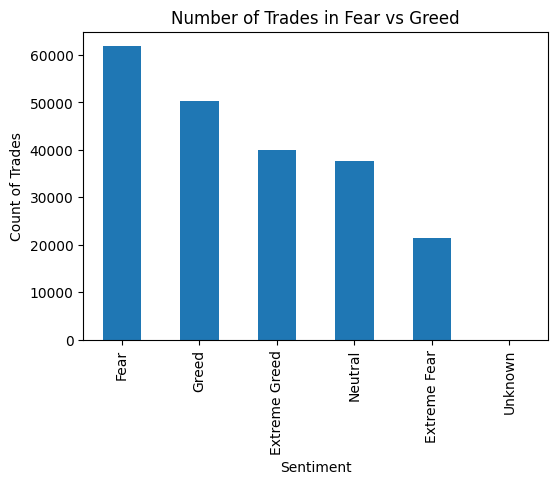

In [23]:
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Number of Trades in Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Count of Trades")
plt.savefig('outputs/trade_count_sentiment.png')
plt.show()

In [24]:
agg = df.groupby('sentiment').agg(
    trades=('account','count'),
    avg_size_usd=('size_usd','mean'),
    avg_size_tokens=('size_tokens','mean'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean()),
    volume_usd=('size_usd','sum')
).reset_index()


In [25]:
agg.to_csv('csv_files/sentiment_metrics.csv', index=False)


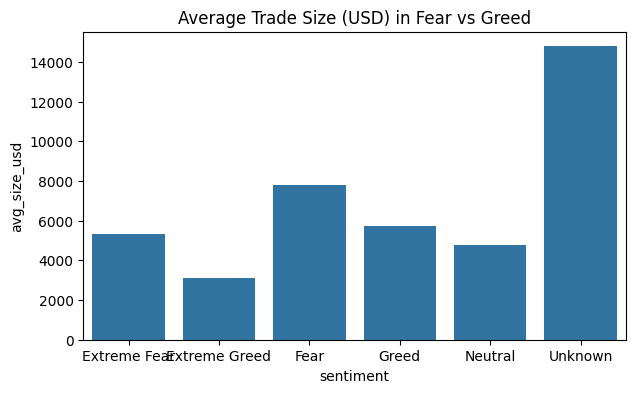

In [26]:
plt.figure(figsize=(7,4))
sns.barplot(x='sentiment', y='avg_size_usd', data=agg)
plt.title("Average Trade Size (USD) in Fear vs Greed")
plt.savefig('outputs/avg_size_usd.png')
plt.show()


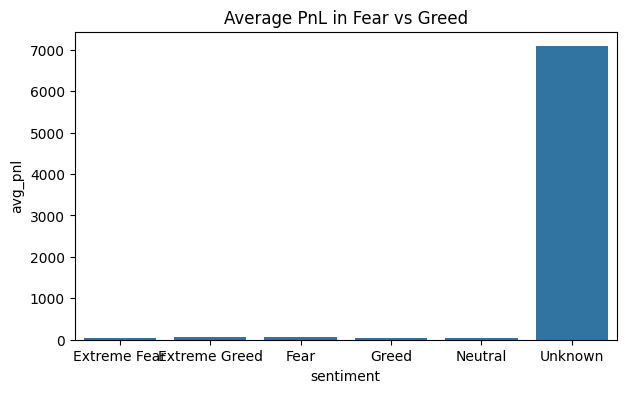

In [27]:
plt.figure(figsize=(7,4))
sns.barplot(x='sentiment', y='avg_pnl', data=agg)
plt.title("Average PnL in Fear vs Greed")
plt.savefig('outputs/avg_pnl.png')
plt.show()


In [28]:
daily = df.groupby(['date','sentiment']).agg(
    total_pnl=('closed_pnl','sum'),
    total_volume_usd=('size_usd','sum'),
    total_volume_tokens=('size_tokens','sum'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean())
).reset_index()


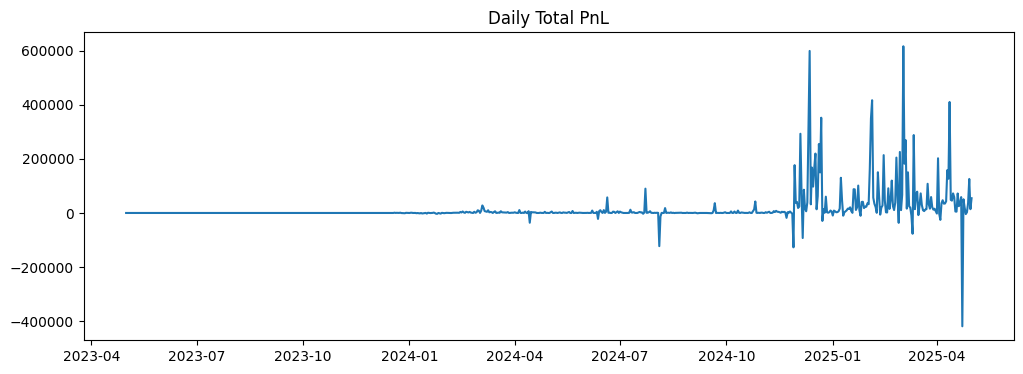

In [29]:
plt.figure(figsize=(12,4))
plt.plot(daily['date'], daily['total_pnl'])
plt.title("Daily Total PnL")
plt.savefig('outputs/daily_pnl.png')
plt.show()


In [30]:
print(df['size_usd'].describe())
print(df['closed_pnl'].describe())


count    2.111810e+05
mean     5.640599e+03
std      3.657877e+04
min      1.000000e-02
25%      1.938100e+02
50%      5.972000e+02
75%      2.059570e+03
max      3.921431e+06
Name: size_usd, dtype: float64
count    211181.000000
mean         48.758927
std         919.258139
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.795379
max      135329.090100
Name: closed_pnl, dtype: float64


In [31]:
from scipy.stats import mannwhitneyu

In [32]:
from scipy.stats import mannwhitneyu

fear_size = df[df['sentiment']=='Fear']['size_usd'].dropna()
greed_size = df[df['sentiment']=='Greed']['size_usd'].dropna()

# default is two-sided test
stat_size, p_size = mannwhitneyu(fear_size, greed_size, alternative='two-sided')

fear_pnl = df[df['sentiment']=='Fear']['closed_pnl'].dropna()
greed_pnl = df[df['sentiment']=='Greed']['closed_pnl'].dropna()
stat_pnl, p_pnl = mannwhitneyu(fear_pnl, greed_pnl, alternative='two-sided')

print("Size USD Mann-Whitney p-value:", p_size)
print("Closed PnL Mann-Whitney p-value:", p_pnl)

# Save results
pd.DataFrame([{
    'metric':'size_usd','stat':stat_size,'p_value':p_size
},{
    'metric':'closed_pnl','stat':stat_pnl,'p_value':p_pnl
}]).to_csv('csv_files/stat_test_results.csv', index=False)


Size USD Mann-Whitney p-value: 1.8322709256361582e-67
Closed PnL Mann-Whitney p-value: 1.955223670884698e-68


In [33]:
acct_day = df.groupby(['account','date','sentiment']).agg(
    n_trades=('account','count'),
    sum_size_usd=('size_usd','sum'),
    mean_size_usd=('size_usd','mean'),
    sum_size_tokens=('size_tokens','sum'),
    avg_pnl=('closed_pnl','mean'),
    total_pnl=('closed_pnl','sum'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean()),
    buy_fraction=('side', lambda x: (x.str.lower() == 'buy').mean() if x.dtype == object else np.nan),
    long_fraction=('direction', lambda x: (x.str.lower() == 'long').mean() if x.dtype == object else np.nan)
).reset_index()

acct_day.to_csv('csv_files/account_day_features.csv', index=False)


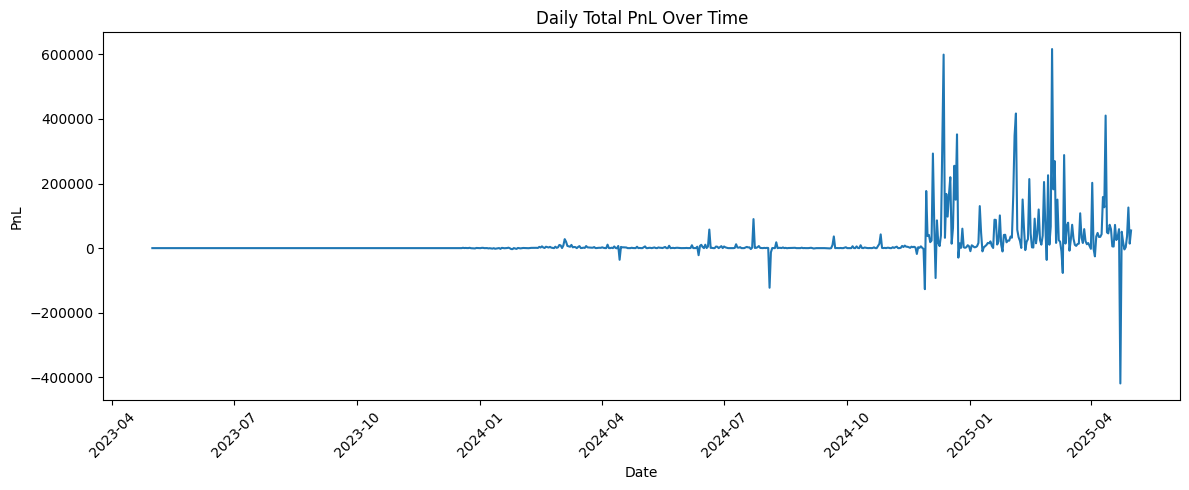

In [34]:
plt.figure(figsize=(12,5))
plt.plot(daily['date'], daily['total_pnl'])
plt.title("Daily Total PnL Over Time")
plt.xlabel("Date")
plt.ylabel("PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/daily_total_pnl.png")
plt.show()


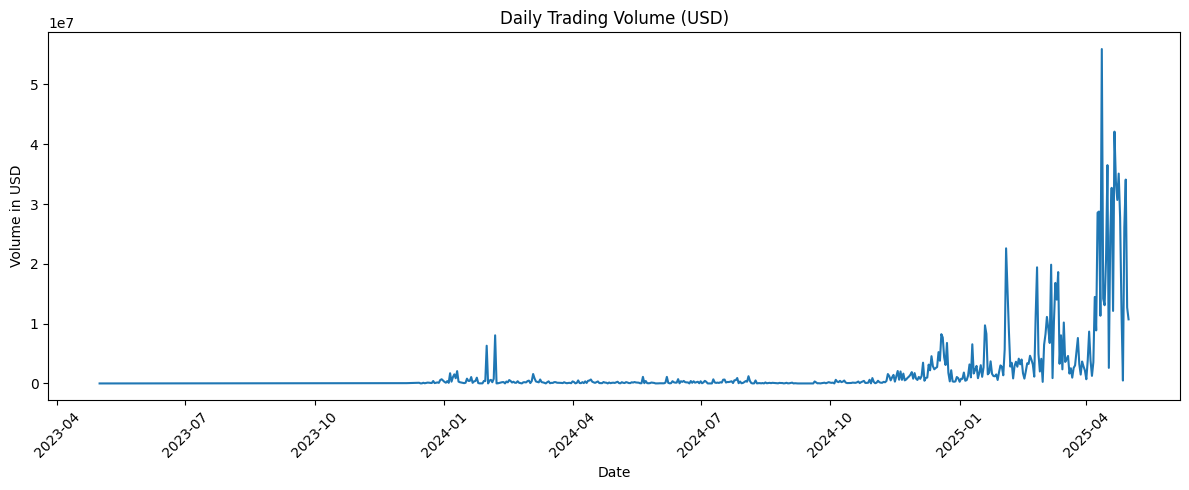

In [35]:
plt.figure(figsize=(12,5))
plt.plot(daily['date'], daily['total_volume_usd'])
plt.title("Daily Trading Volume (USD)")
plt.xlabel("Date")
plt.ylabel("Volume in USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/daily_volume_usd.png")
plt.show()


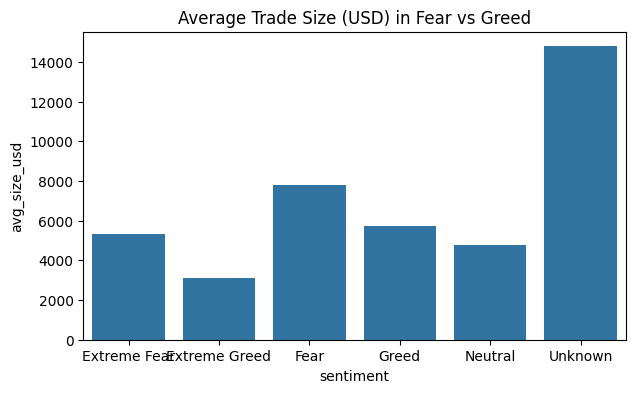

In [36]:
plt.figure(figsize=(7,4))
sns.barplot(data=agg, x="sentiment", y="avg_size_usd")
plt.title("Average Trade Size (USD) in Fear vs Greed")
plt.savefig('outputs/avg_size_usd_by_sentiment.png')
plt.show()


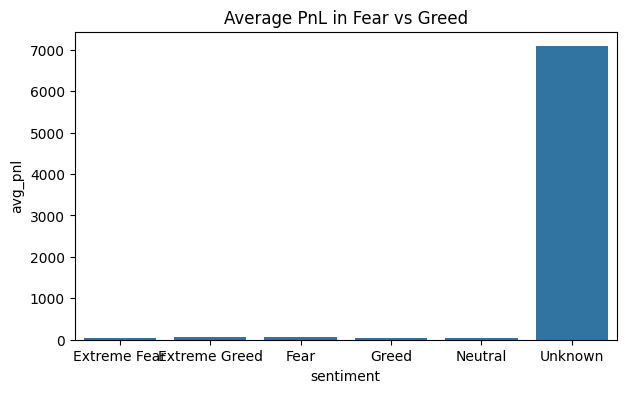

In [37]:
plt.figure(figsize=(7,4))
sns.barplot(data=agg, x="sentiment", y="avg_pnl")
plt.title("Average PnL in Fear vs Greed")
plt.savefig('outputs/avg_pnl_by_sentiment.png')
plt.show()


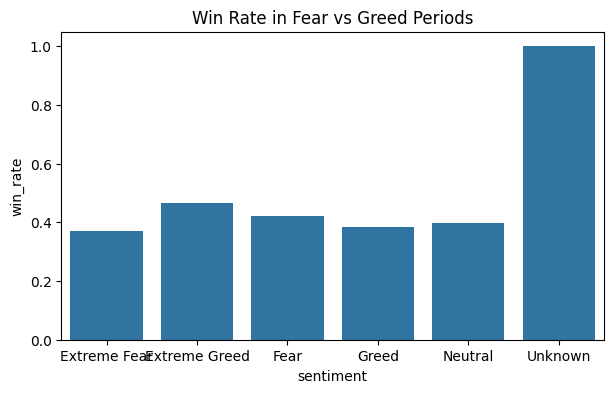

In [38]:
plt.figure(figsize=(7,4))
sns.barplot(x='sentiment', y='win_rate', data=agg)
plt.title("Win Rate in Fear vs Greed Periods")
plt.savefig('outputs/win_rate_by_sentiment.png')
plt.show()


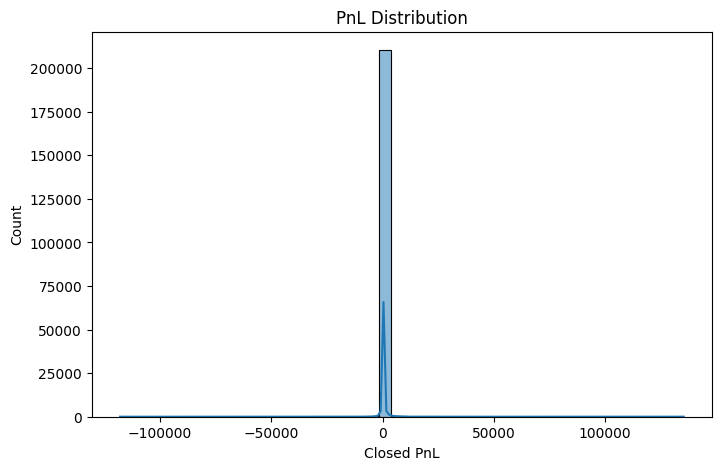

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['closed_pnl'], bins=50, kde=True)
plt.title("PnL Distribution")
plt.xlabel("Closed PnL")
plt.savefig("outputs/pnl_distribution.png")
plt.show()
